## Importing libraries

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## Data Preprocessing

### Training image preprocessing

In [5]:
training_set = tf.keras.utils.image_dataset_from_directory(
    'train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 70295 files belonging to 38 classes.


### Validation image preprocessing

In [8]:
validation_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [11]:
training_set

<_BatchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [13]:
for x,y in training_set:  #Shows the Structure of training set
    print(x,x.shape)
    print(y,y.shape)
    break

tf.Tensor(
[[[[136.5  115.5   98.5 ]
   [154.   133.   116.  ]
   [146.25 125.25 108.25]
   ...
   [145.5  120.5  100.5 ]
   [145.   120.   100.  ]
   [143.25 118.25  98.25]]

  [[153.   132.   115.  ]
   [150.75 129.75 112.75]
   [154.75 133.75 116.75]
   ...
   [145.75 120.75 100.75]
   [148.75 123.75 103.75]
   [142.25 117.25  97.25]]

  [[145.25 124.25 107.25]
   [154.75 133.75 116.75]
   [150.5  129.5  112.5 ]
   ...
   [149.75 124.75 104.75]
   [140.75 115.75  95.75]
   [140.75 115.75  95.75]]

  ...

  [[188.   172.   159.  ]
   [183.75 167.75 154.75]
   [194.   178.   165.  ]
   ...
   [169.25 148.25 131.25]
   [176.   155.   138.  ]
   [175.75 154.75 137.75]]

  [[186.25 172.25 159.25]
   [177.25 163.25 150.25]
   [194.75 180.75 167.75]
   ...
   [182.5  161.5  144.5 ]
   [168.75 147.75 130.75]
   [173.5  152.5  135.5 ]]

  [[188.5  174.5  161.5 ]
   [189.25 175.25 162.25]
   [189.5  175.5  162.5 ]
   ...
   [180.   159.   142.  ]
   [178.5  157.5  140.5 ]
   [178.25 157.25 14

2025-05-08 13:12:56.647995: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [70295]
	 [[{{node Placeholder/_0}}]]
2025-05-08 13:12:56.648388: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [70295]
	 [[{{node Placeholder/_0}}]]
2025-05-08 13:12:56.683989: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


#### To avoid overshooting
1. Choose small learning rate. Default is 0.001, in this model it is 0.0001.
2. In the case of underfitting, increase the number of neurons.
3. Add more Convulational layer to extract more feature from images.

## Building Model

In [17]:
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten,Dropout
from tensorflow.keras.models import Sequential

In [19]:
model = Sequential()

## Building Convulational layer

In [22]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [28]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [30]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [32]:
model.add(Dropout(0.25))  # To avoid overfitting

In [34]:
model.add(Flatten())

In [36]:
model.add(Dense(units=1500,activation='relu'))  #Number of neurons changed from 1024 to 1500

In [38]:
model.add(Dropout(0.4))

In [40]:
#Output layer
model.add(Dense(units=38, activation='softmax'))

## Compiling model

In [43]:
model.compile(optimizer=tf.keras.optimizers.legacy.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [45]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 62, 62, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 31, 31, 64)       0         
 2D)                                                    

### Model training

In [48]:
training_history = model.fit(x=training_set, validation_data=validation_set, epochs=10)

Epoch 1/10
2197/2197 [==============================] - ETA: 0s - loss: 1.3832 - accuracy: 0.5931

2025-05-08 13:37:18.231283: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]
2025-05-08 13:37:18.231460: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


2197/2197 [==============================] - 1519s 691ms/step - loss: 1.3832 - accuracy: 0.5931 - val_loss: 0.6244 - val_accuracy: 0.8034
Epoch 2/10
2197/2197 [==============================] - 4871s 2s/step - loss: 0.4843 - accuracy: 0.8457 - val_loss: 0.3071 - val_accuracy: 0.9004
Epoch 3/10
2197/2197 [==============================] - 4764s 2s/step - loss: 0.2839 - accuracy: 0.9076 - val_loss: 0.2709 - val_accuracy: 0.9135
Epoch 4/10
2197/2197 [==============================] - 1410s 642ms/step - loss: 0.2003 - accuracy: 0.9349 - val_loss: 0.2165 - val_accuracy: 0.9281
Epoch 5/10
2197/2197 [==============================] - 1543s 703ms/step - loss: 0.1455 - accuracy: 0.9520 - val_loss: 0.2239 - val_accuracy: 0.9281
Epoch 6/10
2197/2197 [==============================] - 1451s 661ms/step - loss: 0.1132 - accuracy: 0.9631 - val_loss: 0.1478 - val_accuracy: 0.9526
Epoch 7/10
2197/2197 [==============================] - 1446s 658ms/step - loss: 0.0923 - accuracy: 0.9693 - val_loss: 0.18

### Model Evaluation

In [50]:
#Model evaluation on training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 [==============================] - 374s 170ms/step - loss: 0.0356 - accuracy: 0.9888


In [52]:
print(train_loss, train_acc)

0.035646263509988785 0.9888043403625488


In [54]:
#Model evaluation on validation set
val_loss, val_acc = model.evaluate(validation_set)

550/550 [==============================] - 90s 164ms/step - loss: 0.1265 - accuracy: 0.9624


In [56]:
print(val_loss,val_acc)

0.12645098567008972 0.9624402523040771


### Saving the model

In [58]:
model.save("trained_model.keras")

In [60]:
model.save("trained_model.h5")

In [62]:
training_history.history

{'loss': [1.3832446336746216,
  0.4843452274799347,
  0.28385552763938904,
  0.2003258764743805,
  0.14551080763339996,
  0.11321379244327545,
  0.09232265502214432,
  0.07562130689620972,
  0.06654952466487885,
  0.05865136906504631],
 'accuracy': [0.5931004881858826,
  0.8456789255142212,
  0.9075894355773926,
  0.9349313378334045,
  0.9519880414009094,
  0.9630983471870422,
  0.9692723751068115,
  0.9754320979118347,
  0.9785333275794983,
  0.9811224341392517],
 'val_loss': [0.6243600845336914,
  0.30714452266693115,
  0.27087217569351196,
  0.2165248692035675,
  0.22389592230319977,
  0.14780570566654205,
  0.18376414477825165,
  0.1329841911792755,
  0.12774255871772766,
  0.1264510154724121],
 'val_accuracy': [0.8034372925758362,
  0.9003528356552124,
  0.9134987592697144,
  0.9281243085861206,
  0.9280673861503601,
  0.952595055103302,
  0.945652186870575,
  0.9620987772941589,
  0.9643182158470154,
  0.9624402523040771]}

In [64]:
#Recording the history to avoid re-training the model (in json)
import json
with open("training_history.json","w") as f:
    json.dump(training_history.history,f)

## Visualization of Accuracy

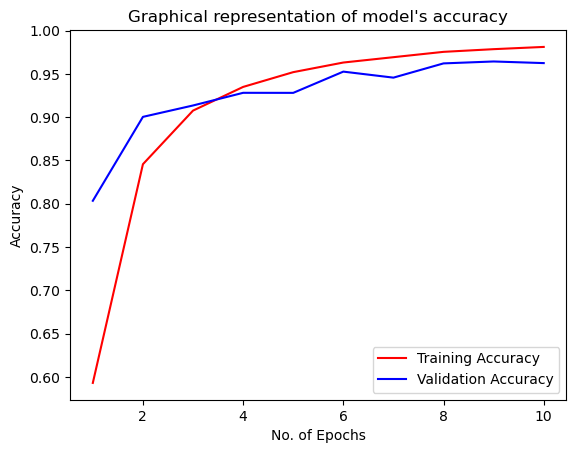

In [67]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy")
plt.title("Graphical representation of model's accuracy")
plt.legend()
plt.show()

### Some other metrics for model evaluation

In [70]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [252]:
## Maybe add some more datasets (if time allows)

In [72]:
test_set = tf.keras.utils.image_dataset_from_directory(
    'valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [74]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

2025-05-08 19:20:36.756094: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype string and shape [17572]
	 [[{{node Placeholder/_0}}]]
2025-05-08 19:20:36.756371: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_4' with dtype int32 and shape [17572]
	 [[{{node Placeholder/_4}}]]


550/550 [==============================] - 95s 172ms/step


(array([[9.99959707e-01, 3.95859788e-05, 1.59323839e-11, ...,
         4.01125666e-15, 1.21051710e-11, 1.97801888e-12],
        [9.99999762e-01, 2.98462566e-09, 3.48870347e-12, ...,
         2.64890296e-19, 1.07073508e-12, 1.30067319e-15],
        [9.99993920e-01, 5.87055638e-06, 7.77524989e-10, ...,
         3.29292661e-17, 1.87787719e-11, 7.50314914e-12],
        ...,
        [1.37386458e-08, 8.52751689e-11, 1.04153735e-08, ...,
         3.42923634e-10, 1.71782955e-09, 9.99978065e-01],
        [8.90095636e-12, 1.51324672e-14, 2.40092633e-11, ...,
         1.45606530e-12, 8.77904954e-13, 1.00000000e+00],
        [1.46914165e-13, 8.68753583e-15, 3.29008705e-14, ...,
         2.47281867e-15, 4.13937374e-12, 9.99997497e-01]], dtype=float32),
 (17572, 38))

In [76]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [78]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [80]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [82]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

### Precision Recall

In [85]:
from sklearn.metrics import classification_report, confusion_matrix

In [87]:
print(classification_report(Y_true, predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.97      0.93      0.95       504
                                 Apple___Black_rot       0.96      1.00      0.98       497
                          Apple___Cedar_apple_rust       0.96      0.96      0.96       440
                                   Apple___healthy       0.97      0.86      0.91       502
                               Blueberry___healthy       0.82      1.00      0.90       454
          Cherry_(including_sour)___Powdery_mildew       1.00      0.98      0.99       421
                 Cherry_(including_sour)___healthy       0.99      0.99      0.99       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.98      0.89      0.93       410
                       Corn_(maize)___Common_rust_       1.00      1.00      1.00       477
               Corn_(maize)___Northern_Leaf_Blight       0.90      0.99      0.

### Visualisation of Confusion Matrix

In [90]:
cm = confusion_matrix(Y_true,predicted_categories)
cm.shape

(38, 38)

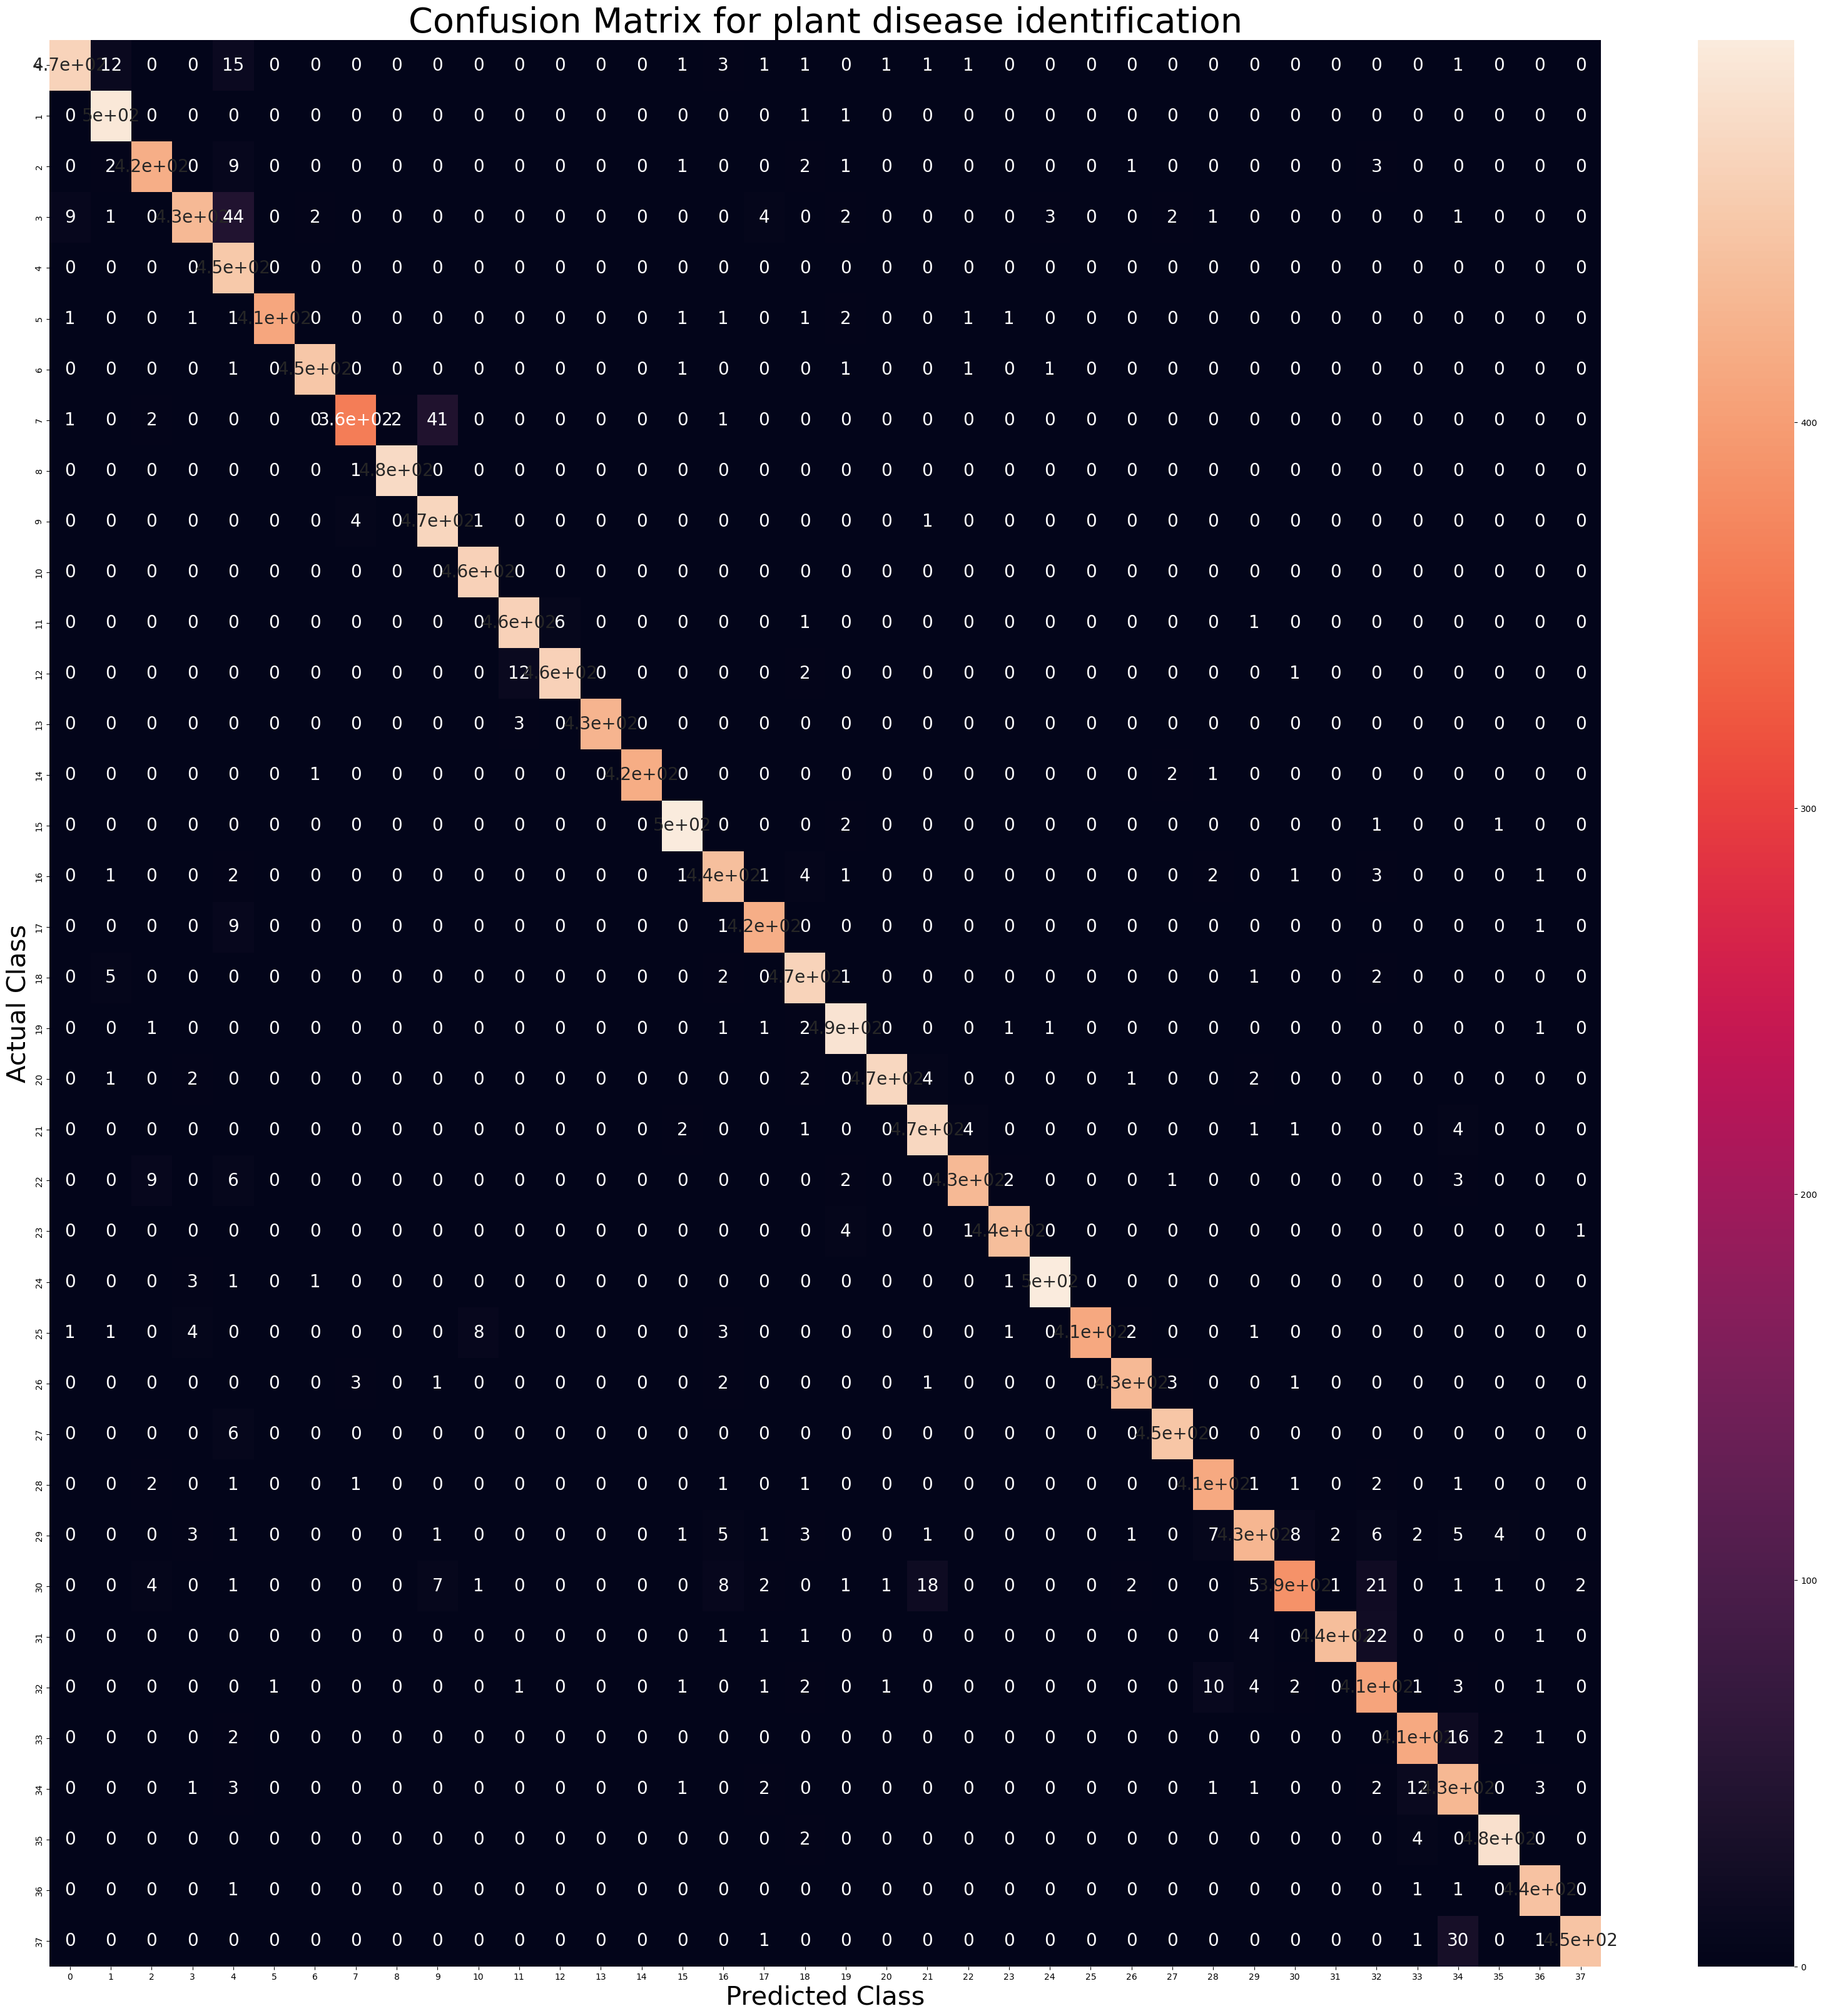

In [92]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':20})  #or sns.heatmap(cm)  
plt.xlabel("Predicted Class",fontsize=30)
plt.ylabel("Actual Class",fontsize=30)
plt.title("Confusion Matrix for plant disease identification",fontsize=40)
plt.show()

In [94]:
model.save("trained_model.h5")